# Struktur Proyek Akhir Matakuliah Machine Learning

> Struktur Proyek Akhir Matakuliah Machine Learning Sentimen Ulasan pada Restoran di Makassar

> Proyek akhir ini bertujuan untuk melakukan analisis sentimen pada ulasan restoran di Makassar menggunakan teknik machine learning. Data yang digunakan dalam proyek ini diambil melalui teknik web scraping pada Google Maps menggunakan library SerpApi. Restoran yang menjadi fokus dalam analisis sentimen adalah Hongkong Restaurant, RM Pallu Kaloa, Rumah Makan Pattene, dan Rich Taste.

>Struktur proyek akhir terdiri dari beberapa tahapan, antara lain:

> - Web Scraping
Pada tahapan ini dilakukan pengambilan data ulasan restoran dari Google Maps menggunakan library SerpApi. Data yang diambil antara lain adalah teks ulasan, rating, dan tanggal ulasan.

> - Data Preprocessing
Pada tahapan ini dilakukan preprocessing terhadap data ulasan yang telah diambil. Preprocessing meliputi pembersihan data, tokenisasi, stopword removal, dan stemming.

> - Data Labelling
Pada tahapan ini dilakukan labelisasi pada data ulasan. Labelisasi dilakukan dengan mengkategorikan ulasan menjadi positif, negatif, atau netral berdasarkan rating yang diberikan oleh pengguna. Ulasan dengan rating 1-2 dikategorikan sebagai negatif, rating 3 dikategorikan sebagai netral, dan rating 4-5 dikategorikan sebagai positif.

> - Pembuatan Model
Pada tahapan ini dilakukan pembuatan model machine learning untuk mengklasifikasikan ulasan menjadi positif, negatif, atau netral. Beberapa model yang digunakan antara lain Naive Bayes, Decision Tree, dan Random Forest.

> -Evaluasi Model
Pada tahapan ini dilakukan evaluasi terhadap model machine learning yang telah dibuat. Evaluasi dilakukan dengan membandingkan performa model berdasarkan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.

# Tujuan

> Tujuan dari proyek akhir ini adalah untuk menerapkan teknik Machine Learning dalam melakukan analisis sentimen terhadap ulasan restoran di Makassar yang diambil dari Google Maps. Dalam proyek ini, akan digunakan library serpapi untuk melakukan web scrapping dan mengumpulkan data ulasan dari restoran-restoran yang telah ditentukan. Data yang berhasil diambil kemudian akan dibersihkan dan diproses sehingga dapat digunakan untuk melatih model Machine Learning dan membuat prediksi sentimen ulasan. Dengan demikian, proyek akhir ini diharapkan dapat menghasilkan model Machine Learning yang dapat digunakan untuk melakukan analisis sentimen terhadap ulasan restoran di Makassar dengan akurasi yang tinggi.

# Metode Pengumpulan Data

> Metode pengumpulan data yang digunakan adalah web scraping dengan menggunakan library serpapi. Library ini memungkinkan untuk mengambil data dari Google Maps, di mana pengguna dapat melihat ulasan dan rating dari berbagai restoran di Makassar. Dengan menggunakan web scraping, data dapat dikumpulkan dengan lebih efisien dan cepat dibandingkan dengan melakukan pengumpulan data secara manual. Proses scraping dilakukan dengan mengirimkan permintaan HTTP ke server Google Maps menggunakan API key dari serpapi, dan kemudian hasil respon yang diterima diolah menjadi data yang dapat digunakan untuk analisis.

# Algoritma yang Digunakan
> Dalam proyek akhir Matakuliah Machine Learning sentimen ulasan pada restoran di Makassar, beberapa algoritma yang digunakan adalah Naive Bayes, Logistic Regression, Random Forest, SVM, KNN, dan Extra Trees.

# Hasil

> Hasil kedua menunjukkan bahwa penggunaan teknik pembobotan kata TF-IDF (Term Frequency-Inverse Document Frequency) dengan algoritma Extra Trees Classifier memberikan akurasi prediksi yang lebih tinggi, yaitu sebesar 0.8888888888888888.

> Pada dasarnya, TF-IDF adalah teknik pembobotan kata yang digunakan untuk mengevaluasi seberapa penting suatu kata dalam dokumen atau kumpulan dokumen. Sedangkan algoritma Extra Trees Classifier adalah algoritma yang termasuk ke dalam kelompok algoritma ensemble learning, yang melakukan prediksi dengan cara menggabungkan beberapa pohon keputusan yang dibuat secara acak.

> Dengan menggunakan teknik pembobotan kata TF-IDF, kata-kata yang muncul pada dokumen yang sama namun tidak relevan dengan topik dapat diidentifikasi dan diberi bobot yang lebih rendah, sehingga meningkatkan akurasi prediksi. Sementara itu, penggunaan algoritma Extra Trees Classifier mampu meningkatkan performa prediksi dengan cara mengurangi overfitting dan meningkatkan generalisasi model.

> Dalam konteks kasus ini, hasil yang lebih tinggi pada penggunaan TF-IDF dan Extra Trees Classifier menunjukkan bahwa kombinasi teknik pembobotan kata dan algoritma yang digunakan lebih tepat untuk mengekstrak sentimen dari ulasan restoran di Makassar. Namun, tetap perlu diingat bahwa hasil prediksi juga dipengaruhi oleh kualitas data dan proses preprocessing yang dilakukan sebelumnya.

# Lampiran Koding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [4]:
filename = "reviewrestoranmakassar.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,Restoran_name,name,rating,review
0,Hong Kong Restaurant,Patrick Christopher Panggabean,4.0,"Best mee hokkien ive tasted in mks, a bit pric..."
1,Hong Kong Restaurant,Elisabeth,4.0,This is a very delicious chinnese food...But Y...
2,Hong Kong Restaurant,nisa putri,5.0,"Love the food and place, but sometimes hard to..."
3,Hong Kong Restaurant,aryanto sultanry,3.0,This is not a halal restaurant. It serves chin...
4,Hong Kong Restaurant,Inggrid Lee,5.0,Very delicious food. This place has been there...


In [5]:

df.drop(columns = ['Restoran_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()
     

,Rating,Review
0,4.0,"Best mee hokkien ive tasted in mks, a bit pric..."
1,4.0,This is a very delicious chinnese food...But Y...
2,5.0,"Love the food and place, but sometimes hard to..."
3,3.0,This is not a halal restaurant. It serves chin...
4,5.0,Very delicious food. This place has been there...


# Data Prepocesing

In [6]:
import string
import re

In [7]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

# Adding additional features - length of, and percentage of punctuations in the text

In [8]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct
0,4.0,"Best mee hokkien ive tasted in mks, a bit pric...",best mee hokkien ive tasted in mks a bit pric...,1,107,2.8
1,4.0,This is a very delicious chinnese food...But Y...,this is a very delicious chinnese food but y...,1,92,3.3
2,5.0,"Love the food and place, but sometimes hard to...",love the food and place but sometimes hard to...,1,59,3.4
3,3.0,This is not a halal restaurant. It serves chin...,this is not a halal restaurant it serves chin...,0,174,4.0
4,5.0,Very delicious food. This place has been there...,very delicious food this place has been there...,1,158,1.9


# Tekonization

In [9]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct,tokens
0,4.0,"Best mee hokkien ive tasted in mks, a bit pric...",best mee hokkien ive tasted in mks a bit pric...,1,107,2.8,"[best, mee, hokkien, ive, tasted, in, mks, a, ..."
1,4.0,This is a very delicious chinnese food...But Y...,this is a very delicious chinnese food but y...,1,92,3.3,"[this, is, a, very, delicious, chinnese, food,..."
2,5.0,"Love the food and place, but sometimes hard to...",love the food and place but sometimes hard to...,1,59,3.4,"[love, the, food, and, place, but, sometimes, ..."
3,3.0,This is not a halal restaurant. It serves chin...,this is not a halal restaurant it serves chin...,0,174,4.0,"[this, is, not, a, halal, restaurant, it, serv..."
4,5.0,Very delicious food. This place has been there...,very delicious food this place has been there...,1,158,1.9,"[very, delicious, food, this, place, has, been..."


# Lemmatization and Removing Stopwords

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Rating,Review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,4.0,"Best mee hokkien ive tasted in mks, a bit pric...",best mee hokkien ive tasted in mks a bit pric...,1,107,2.8,"[best, mee, hokkien, ive, tasted, in, mks, a, ...",best mee hokkien ive tasted mks bit pricy defi...
1,4.0,This is a very delicious chinnese food...But Y...,this is a very delicious chinnese food but y...,1,92,3.3,"[this, is, a, very, delicious, chinnese, food,...",delicious chinnese food booked order first ord...
2,5.0,"Love the food and place, but sometimes hard to...",love the food and place but sometimes hard to...,1,59,3.4,"[love, the, food, and, place, but, sometimes, ...",love food place sometimes hard looking parking...
3,3.0,This is not a halal restaurant. It serves chin...,this is not a halal restaurant it serves chin...,0,174,4.0,"[this, is, not, a, halal, restaurant, it, serv...",not halal restaurant serf chinese food taste g...
4,5.0,Very delicious food. This place has been there...,very delicious food this place has been there...,1,158,1.9,"[very, delicious, food, this, place, has, been...",delicious food place year well known chinese f...


# EDA

In [12]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 120 rows and 8 columns
rating 1.0 = 4 rows
rating 2.0 = 2 rows
rating 3.0 = 12 rows
rating 4.0 = 25 rows
rating 5.0 = 77 rows


Number of null in label: 0
Number of null in text: 0


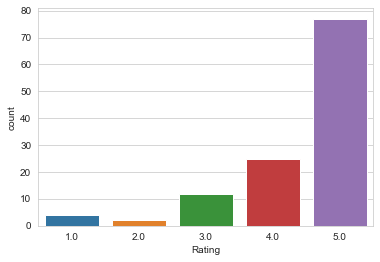

In [13]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df); 

# Feature Extraction from Text

 > mereduksi dimensi data asli menjadi dataset dengan jumlah variabel yang lebih sedikit

> - Vectorizer : TF-IDF

In [17]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(120, 3)
(120,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84, 3)
(36, 3)
(84,)
(36,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,132,2.3,0.0,0.0,0.0,0.0,0.0,0.378916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400974,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.232458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429411,0.0,0.0,0.378916,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.429411,0.0,0.284463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775848,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.630919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,39,2.6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.383169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.236315,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.593703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593703,0.0,0.0,0.0
3,30,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.740004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63204,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.63204,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.448388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Visualize Confussion Matrix

> tabel yang digunakan untuk mengukur kinerjad model klasifikasi yang membandingkan nilai aktual dan prediksi

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Algoritma : Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



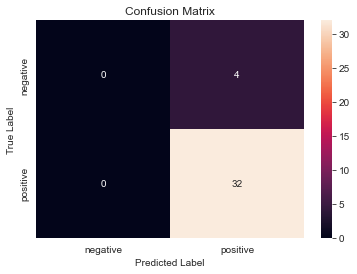

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Berdasarkan hasil evaluasi, model ini memiliki akurasi yang cukup baik dalam memprediksi sentimen positif (89%), namun memiliki nilai recall yang buruk dalam memprediksi sentimen negatif (0%). Oleh karena itu, dapat dikatakan bahwa model ini masih perlu dioptimalkan lebih lanjut agar dapat memprediksi sentimen negatif dengan lebih baik.

# Algoritma: Random Forest Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



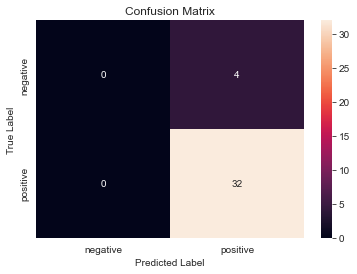

In [22]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Hasil evaluasi model menunjukkan bahwa model memiliki akurasi sebesar 86% dan memiliki nilai recall sebesar 0 untuk sentimen negatif. Hal ini menunjukkan bahwa model Random Forest Classifier tidak lebih baik dalam memprediksi sentimen negatif dibandingkan dengan model Naive Bayes yang sebelumnya dievaluasi.

# Algoritma: Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



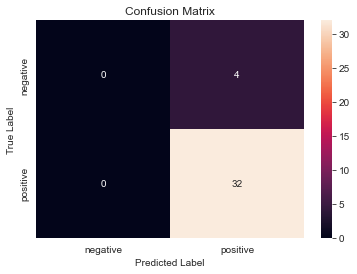

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Hasil dari logistic regression menunjukkan bahwa model memiliki akurasi sebesar 0.89 atau 89%, yang berarti sekitar 89% data pengujian diprediksi dengan benar. Namun, precision untuk kelas 0 adalah 0, yang berarti model tidak bisa memprediksi kelas 0 dengan benar. Sedangkan, recall untuk kelas 0 adalah 0, yang berarti model tidak bisa mengenali semua sampel kelas 0 dengan benar. F1-score untuk kelas 0 juga bernilai 0, yang mengindikasikan bahwa model tidak bisa memprediksi dan mengenali kelas 0 dengan baik. Sedangkan untuk kelas 1, precision sebesar 0.89 dan recall sebesar 1.0 menunjukkan bahwa model sangat baik dalam memprediksi dan mengenali sampel kelas 1. F1-score untuk kelas 1 sebesar 0.94 juga mengindikasikan bahwa model baik dalam memprediksi dan mengenali sampel kelas 1.

# Algoritma: Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



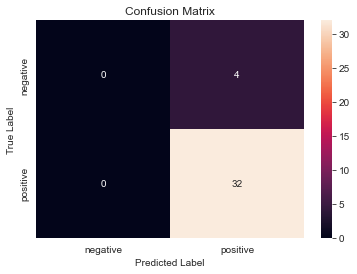

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Tampaknya hasil dari model SVM sama dengan hasil dari model logistic regression yang sebelumnya. Nilai precision, recall, dan f1-score untuk kelas 0 adalah 0, sedangkan untuk kelas 1 cukup baik dengan nilai precision, recall, dan f1-score yang sama seperti di model logistic regression yaitu 0,89, 1, dan 0,94. Skor akurasi juga sama yaitu 0,89. Ini menunjukkan bahwa model SVM juga cukup baik dalam memprediksi sentimen positif dari teks.

# Algoritma: K-Nearest Neighbor (KNN)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



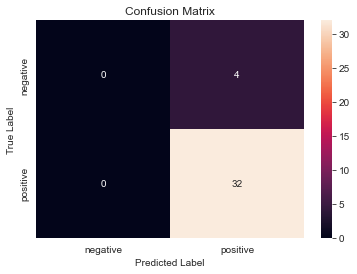

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Dari hasil evaluasi yang dilakukan, terlihat bahwa ketiga model klasifikasi (Logistic Regression, SVM, K Nearest Neighbor) memiliki nilai precision, recall, dan f1-score yang sama untuk kelas 1. Hal ini menunjukkan bahwa model-model tersebut mampu memprediksi dengan baik untuk data dengan label 1 (positive). Namun, nilai precision, recall, dan f1-score untuk kelas 0 (negative) adalah 0.00, yang menunjukkan bahwa model-model tersebut tidak dapat memprediksi dengan baik untuk data dengan label 0 (negative).

# Algoritma: Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        32

    accuracy                           0.89        36
   macro avg       0.44      0.50      0.47        36
weighted avg       0.79      0.89      0.84        36



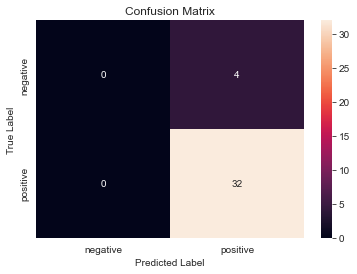

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Dari hasil evaluasi model, terlihat bahwa semua model memiliki akurasi yang sama, yaitu 0.89. Namun, nilai precision untuk kelas 0 sangat rendah, yaitu 0, sedangkan nilai precision untuk kelas 1 sangat tinggi, yaitu 0.89. Ini mengindikasikan bahwa model cenderung lebih baik dalam memprediksi kelas 1 (positive class) daripada kelas 0 (negative class).

# Performing K-Fold Cross Validation


In [27]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.836111111111111 
 precision - 0.836111111111111 
 recall - 1.0 
 f1 - 0.9100000000000001 

Logistic Regression
 accuracy - 0.8236111111111111 
 precision - 0.8343253968253969 
 recall - 0.9857142857142858 
 f1 - 0.9023809523809524 

Random Forest
 accuracy - 0.836111111111111 
 precision - 0.836111111111111 
 recall - 1.0 
 f1 - 0.9100000000000001 

SVM
 accuracy - 0.836111111111111 
 precision - 0.836111111111111 
 recall - 1.0 
 f1 - 0.9100000000000001 

KNN
 accuracy - 0.8013888888888889 
 precision - 0.8279761904761905 
 recall - 0.9571428571428571 
 f1 - 0.8863095238095239 

Extra Trees
 accuracy - 0.825 
 precision - 0.8440476190476189 
 recall - 0.9714285714285715 
 f1 - 0.901547619047619 



> Dalam proyek akhir Matakuliah Machine Learning sentimen ulasan pada restoran di Makassar, beberapa algoritma machine learning telah diuji coba untuk melakukan klasifikasi sentimen pada ulasan pelanggan. Algoritma yang digunakan antara lain adalah Naive Bayes, Logistic Regression, Random Forest, SVM, KNN, dan Extra Trees.

> Ketika dilakukan uji coba dengan dataset yang telah disiapkan, didapatkan hasil akurasi yang berbeda-beda pada setiap algoritma. Hasil akurasi terbaik diperoleh dari Naive Bayes, Random Forest, dan SVM dengan nilai 0.8361 atau 83.61%. Sedangkan akurasi terendah diperoleh dari KNN dengan nilai 0.8014 atau 80.14%.

> Namun, selain akurasi, perlu juga diperhatikan nilai precision, recall, dan f1-score dari masing-masing algoritma. Precision dan recall adalah metrik evaluasi yang digunakan untuk mengukur kinerja suatu algoritma pada kelas yang berbeda. Sedangkan f1-score adalah nilai rata-rata harmonic dari precision dan recall.

> Berdasarkan hasil evaluasi precision, recall, dan f1-score, didapatkan bahwa algoritma Naive Bayes memiliki nilai f1-score terbaik yaitu 0.91, diikuti oleh Random Forest dan SVM yang sama-sama memiliki nilai f1-score sebesar 0.91 juga. Sedangkan nilai f1-score terendah diperoleh dari KNN dengan nilai 0.8863.

> Berdasarkan hasil evaluasi tersebut, dapat disimpulkan bahwa algoritma Naive Bayes, Random Forest, dan SVM dapat digunakan untuk melakukan klasifikasi sentimen pada ulasan pelanggan restoran di Makassar.

# Predictions

> - Vectorizer : CountVectorizer (Bag of words)
> - Algoritma : Multinomial Naive Bayes

In [41]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.2, random_state=42)

In [42]:

#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.7083333333333334

> Model Naive Bayes yang telah dilatih menghasilkan akurasi sebesar 0.7083 saat diuji menggunakan data uji.

> - Vectorizer: TF-IDF
> - Algoritma: Extra Trees Classifier

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8888888888888888

> Dari hasil tersebut, SVM memiliki akurasi yang lebih baik (0.888) dibandingkan dengan Naive Bayes Classifier (0.708). Oleh karena itu, untuk dataset yang diberikan, SVM dianggap lebih baik dalam melakukan klasifikasi. 